In [1]:
import numpy as np
import matplotlib.pyplot as plt
import surface_code
import layers
import matching

# Demo surface code simulations
Here we will se the surface code in action!


In [2]:
# Define the parameters for the surface code
distance = 10
topology = "toric"

# Initialize objects
sc = surface_code.SurfaceCode(distance, topology)
lc = layers.Layers(sc)

In [3]:
# Error rates 
p = 0.022 # Quit error rate
q = 0.022 # Measurement error rate

cycles = 20 # Number of stabilizer measurements 

LOGICAL QUBITS:  ([1.0, 1.0], [1.0, 1.0])


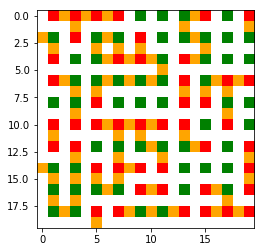

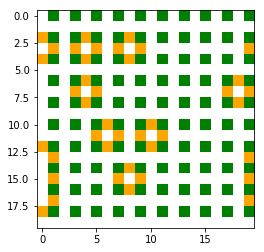

In [10]:
# Take measurements and apply errors
for t in range(cycles):
    sc.apply_qubit_error(p, 0)
    sc.measure_all_stabilizers()
    sc.apply_measurement_error(q)
    lc.add()
# Final perfect last measurement
sc.measure_all_stabilizers()
lc.add()

# Plot of the errors on the surface code
sc.plot("star")

# Decode and apply corrections
lc.decode()
    
# Sanity check for errors in decoding and correcting
sc.measure_all_stabilizers()
if (sc.qubits[:, sc.tags != "Q"] == -1).any():
    print("FAILURE CORRECTING")

# Plot the corrected code
sc.plot("star")
    
# Measure logical qubit
logical = sc.measure_logical()

# Check if a logical error happens
print("LOGICAL QUBITS: ", logical)
if -1 in logical[0] or -1 in logical[1]:
   print("LOGICAL QUBIT ERROR")

    
plt.show()
# Reset the surface code and erase all the stored measurements
lc.reset()
sc.reset()

In [ ]:
# Parameters for noisy measurement
ps = 0.003
pm = 0.003
pg = 0.003
eta = 0.01
a0 = 12.0
a1 = 1/80.
protocol = "GHZ"
theta = .24

p = 0.022
q = 0.022
iterations = 1
cycles = 20